In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.multivariate.manova import MANOVA

In [20]:
# notebook settings
pd.set_option("max_columns",100)

In [21]:
# import all datasets
team_stats = pd.read_csv('team_stats.csv') # contains team stats by season
player_stats = pd.read_csv('player_stats.csv') # contains player stats by season
season_standings = pd.read_csv('standing_stats.csv') # contains team standings and ranking by season
team_abbrev = pd.read_csv('team_abrev.csv') # team abbreviation lookup
season_standings.head()

,Team,W,L,W/L%,PS/G,PA/G,SRS,Season,Conference
0,MIAMI HEAT,52,30,0.634,94.4,91.3,2.75,1999-2000,East
1,NEW YORK KNICKS,50,32,0.610,92.1,90.7,1.30,1999-2000,East
2,PHILADELPHIA 76ERS,49,33,0.598,94.8,93.4,1.02,1999-2000,East
3,ORLANDO MAGIC,41,41,0.500,100.1,99.4,0.43,1999-2000,East
4,BOSTON CELTICS,35,47,0.427,99.3,100.1,-1.00,1999-2000,East


In [22]:
teams = team_stats.loc[team_stats['Team'].isin(['CLEVELAND CAVALIERS','MIAMI HEAT','LOS ANGELES LAKERS'])] # get df with just LBJ teams
standings = season_standings.loc[season_standings['Team'].isin(['CLEVELAND CAVALIERS','MIAMI HEAT','LOS ANGELES LAKERS'])] # get standings with just LBJ teams
player_stats.rename(columns={"Tm": "Team"}, inplace=True)
teams.head()

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
5,LOS ANGELES LAKERS,82,19805,3137,6836,0.459,344,1047,0.329,2793,5789,0.482,1649,2368,0.696,1117,2738,3855,1921,613,534,1143,1841,8267,1999-2000
17,CLEVELAND CAVALIERS,82,19855,2977,6734,0.442,343,919,0.373,2634,5815,0.453,1653,2205,0.750,1010,2499,3509,1941,715,363,1427,2219,7950,1999-2000
23,MIAMI HEAT,82,19830,2974,6462,0.460,446,1202,0.371,2528,5260,0.481,1345,1827,0.736,921,2619,3540,1931,582,524,1231,1947,7739,1999-2000
31,LOS ANGELES LAKERS,82,19905,3109,6685,0.465,439,1275,0.344,2670,5410,0.494,1594,2333,0.683,1085,2583,3668,1888,564,490,1184,1872,8251,2000-2001
50,CLEVELAND CAVALIERS,82,19830,2890,6532,0.442,220,659,0.334,2670,5873,0.455,1561,2040,0.765,1015,2440,3455,1708,642,436,1350,1904,7561,2000-2001


In [23]:
standings.describe(include='all')

,Team,W,L,W/L%,PS/G,PA/G,SRS,Season,Conference
count,63,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63,63
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,21,2
top,LOS ANGELES LAKERS,NaN,NaN,NaN,NaN,NaN,NaN,1999-2000,East
freq,21,NaN,NaN,NaN,NaN,NaN,NaN,3,42
mean,NaN,42.698413,37.952381,0.529365,99.882540,99.403175,0.376825,NaN,NaN
std,NaN,13.974210,13.930042,0.171020,6.004556,6.444477,4.988781,NaN,NaN
min,NaN,15.000000,15.000000,0.183000,85.600000,86.600000,-9.590000,NaN,NaN
25%,NaN,33.500000,26.000000,0.408500,96.500000,95.400000,-3.295000,NaN,NaN
50%,NaN,44.000000,37.000000,0.549000,100.000000,98.000000,0.770000,NaN,NaN
75%,NaN,52.500000,47.000000,0.671000,103.150000,102.500000,4.115000,NaN,NaN


In [24]:
# df checks
standings.info()
player_stats.info()
teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 615
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Team        63 non-null     object 
 1   W           63 non-null     int64  
 2   L           63 non-null     int64  
 3   W/L%        63 non-null     float64
 4   PS/G        63 non-null     float64
 5   PA/G        63 non-null     float64
 6   SRS         63 non-null     float64
 7   Season      63 non-null     object 
 8   Conference  63 non-null     object 
dtypes: float64(4), int64(2), object(3)
memory usage: 4.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12227 entries, 0 to 12226
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  12227 non-null  object 
 1   Pos     12227 non-null  object 
 2   Age     12227 non-null  int64  
 3   Team    12227 non-null  object 
 4   G       12227 non-null  int64  
 5   GS      122

<AxesSubplot:>

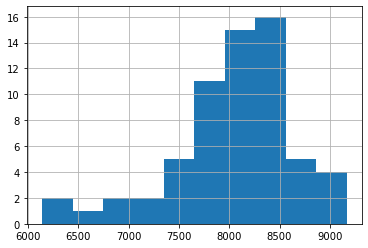

In [25]:
# distribution of team point totals
teams.PTS.hist()

<AxesSubplot:>

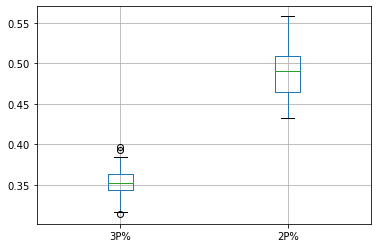

In [26]:
# boxplot of team 3p and 2p averages
teams.boxplot(column=['3P%','2P%'])

In [27]:
# setting up data frames for visualization
dfx = standings[['Team','W/L%','Season']]
dfx[['season_start','season_end']] = dfx.Season.str.split("-",expand=True)
dfx = dfx.astype({'season_start': 'int64', 'season_end': 'int64'})
dfx.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Team,W/L%,Season,season_start,season_end
0,MIAMI HEAT,0.634,1999-2000,1999,2000
12,CLEVELAND CAVALIERS,0.390,1999-2000,1999,2000
16,MIAMI HEAT,0.610,2000-2001,2000,2001
27,CLEVELAND CAVALIERS,0.366,2000-2001,2000,2001
35,MIAMI HEAT,0.439,2001-2002,2001,2002


<AxesSubplot:xlabel='season_end'>

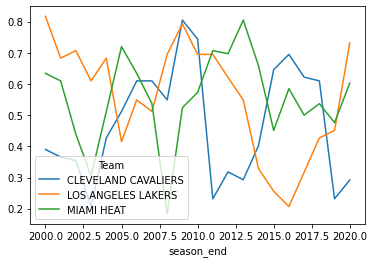

In [28]:
# displaying win/loss% by team/season 
dfx = dfx.pivot(index='season_end', columns=['Team'], values='W/L%')
dfx.plot()

In [29]:
# getting df with just LBJ stats
lbj = player_stats[['Player','Team','Season']].loc[player_stats['Player'].isin(['LeBron James'])]

In [30]:
# merging tables to get standings for each team by season
teams_standings = pd.merge(teams, standings, on=['Team', 'Season'])
teams_standings

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,W,L,W/L%,PS/G,PA/G,SRS,Conference
0,LOS ANGELES LAKERS,82,19805,3137,6836,0.459,344,1047,0.329,2793,5789,0.482,1649,2368,0.696,1117,2738,3855,1921,613,534,1143,1841,8267,1999-2000,67,15,0.817,100.8,92.3,8.41,West
1,CLEVELAND CAVALIERS,82,19855,2977,6734,0.442,343,919,0.373,2634,5815,0.453,1653,2205,0.750,1010,2499,3509,1941,715,363,1427,2219,7950,1999-2000,32,50,0.390,97.0,100.5,-3.64,East
2,MIAMI HEAT,82,19830,2974,6462,0.460,446,1202,0.371,2528,5260,0.481,1345,1827,0.736,921,2619,3540,1931,582,524,1231,1947,7739,1999-2000,52,30,0.634,94.4,91.3,2.75,East
3,LOS ANGELES LAKERS,82,19905,3109,6685,0.465,439,1275,0.344,2670,5410,0.494,1594,2333,0.683,1085,2583,3668,1888,564,490,1184,1872,8251,2000-2001,56,26,0.683,100.6,97.2,3.74,West
4,CLEVELAND CAVALIERS,82,19830,2890,6532,0.442,220,659,0.334,2670,5873,0.455,1561,2040,0.765,1015,2440,3455,1708,642,436,1350,1904,7561,2000-2001,30,52,0.366,92.2,96.5,-4.48,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,MIAMI HEAT,82,19730,3251,7218,0.450,928,2658,0.349,2323,4560,0.509,1238,1782,0.695,921,2879,3800,1991,627,448,1208,1712,8668,2018-2019,39,43,0.476,105.7,105.9,-0.45,East
59,CLEVELAND CAVALIERS,82,19755,3189,7184,0.444,847,2388,0.355,2342,4796,0.488,1342,1694,0.792,879,2619,3498,1698,534,195,1106,1642,8567,2018-2019,19,63,0.232,104.5,114.1,-9.39,East
60,MIAMI HEAT,73,17745,2880,6160,0.468,979,2584,0.379,1901,3576,0.532,1440,1840,0.783,620,2619,3239,1892,547,332,1088,1501,8179,2019-2020,44,29,0.603,112.0,109.1,2.59,East
61,LOS ANGELES LAKERS,71,17090,3006,6269,0.480,782,2242,0.349,2224,4027,0.552,1260,1728,0.729,757,2490,3247,1803,612,468,1077,1471,8054,2019-2020,52,19,0.732,113.4,107.6,6.28,West


In [33]:
# trend analysis
